# 5.1. Pandas: Basics

Module M-227-04: Programming for Data Analytics

Instructor: prof. Dmitry Pavlyuk

## pandas

__pandas__ is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

McKinney (the author of the base book for this course, Python for Data Analysis: Data Wrangling with pandas, NumPy, and Jupyter) is one of the founding developers of this library


In [1]:
!pip install pandas

In [2]:
import pandas as pd

## pandas vs numpy

|                 | NumPy                                          | pandas                                    |
|-----------------|------------------------------------------------|-------------------------------------------|
| Data            | Homogeneous                                    | Heterogeneous                             |
| Primary objects | ndarray                                        | DataFrame, Series                         |
| Indexing        | By position                                    | By position and index                     |
| Memory          | Efficient                                      | Larger                                    |
| Speed           | Faster for arrays of several thousand elements | Faster for arrays of millions of elements |
| Primary purpose | Calculations                                   | Data wrangling                            |

Usually the packages are used together!

## Loading / Saving Data

### Loading data to pandas

* from CSV __read_csv__ 
* from XLS, XLSX __read_excel___
* from JSON __read_json__
* from databases __read_sql__
* from HTML __read_html__

Methods work not only for local files, but also accept URLs

### Example data set: Bike Sharing Demand

Source: Kaggle machine learning competition
URL: https://www.kaggle.com/competitions/bike-sharing-demand/overview/description

* __datetime__ - hourly date + timestamp  
* __season__ -  spring / summer / fall / winter 
* __holiday__, __workingday__- whether the day is considered a holiday/workingday
* __weather__ 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* __temp__ and __atemp__- temperature and "feels like" temperature in Celsius
* __humidity__ - relative humidity
* __windspeed__ - wind speed
* __casual__, __registered__, __count__ - number of non-registered / registered / total user rentals initiated

### Loading Bike Sharing Demand Data

In [3]:
bikes = pd.read_csv('data/bikes.csv') 
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


### Loading HTML data

In [4]:
ss_bmw = pd.read_html('https://www.ss.lv/lv/transport/cars/bmw/sell/', header=0)
print(len(ss_bmw))
main_table = sorted(ss_bmw,key=lambda x:len(x), reverse=True)[0]
main_table.head()

8


,Sludinājumi \tdatums,Sludinājumi \tdatums.1,Sludinājumi \tdatums.2,Modelis,Gads,Tilp.,Nobrauk.,Cena
0,NaN,NaN,Pārdodu tikko ievestu BMW E46 M-pack 330d Face...,330,2003,3.0D,339 tūkst.,"1,899 €"
1,NaN,NaN,"Jauna TA, jaunas m+s riepas. Rūsa ir tek bāka ...",725,1998,2.5D,385 tūkst.,"1,700 €"
2,NaN,NaN,"BMW F10 535d 230kW/313zs, 2012.G, M+S, Bagātīg...",535,2012,3.0D,-,"15,700 €"
3,NaN,NaN,"Tikko atvests , viss strādā rūc un brauc, apak...",316,1990,1.6,185 tūkst.,"3,799 €"
4,NaN,NaN,"Продаётся бмв е46 110кв 2.0 дизель, стоит чип ...",320,2002,2.0D,-,"1,800 €"


## Loading data - options

.read_xxx has many parameters (50+) for

* Indexing - get column/row names from the file, arguments you provide, or not at all.
* Type inference and data conversion - including the user-defined value conversions, list of missing value markers, etc.
* Date and time parsing - parsing format, including merging several columns
* Iterating - support for iterating over chunks of very large files.
* Unclean data issues - skipping rows, comments, or other minor things like numeric data with thousands separated by commas
* Dialects (e.g., CSV dialect)

## Saving data

Very straightforward using __.to_XXX__ methods:
* .to_csv()
* .to_excel()
* .to_sql()
* .to_markdown()

## Pandas Data Structures

### Series and Dataframes

* __Series__
    * 1D array
    * Homogeneous
    * size immutable
* __DataFrame__
    * list of Series
    * 2D array
    * Heterogeneous
    * size mutable
* __Panel__
    * 3D array
    * Deprecated

### Bikes dataset: Series

In [5]:
print(type(bikes["count"]))
bikes["count"].head()

<class 'pandas.core.series.Series'>


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Bikes dataset: DataFrame

In [6]:
print(type(bikes))
bikes.head()

<class 'pandas.core.frame.DataFrame'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


Note the index!

### Series and DataFrames as dictionaries

### Series as a dictionary

In [7]:
bikes["count"].head().to_dict()

{0: 16, 1: 40, 2: 32, 3: 13, 4: 1}

### Dataframe row as a dictionary

In [8]:
bikes.iloc[0,:].to_dict()

{'datetime': '01/01/2011 00:00',
 'season': 'spring',
 'holiday': 0,
 'workingday': 0,
 'weather': 1,
 'temp': 9.84,
 'atemp': 14.395,
 'humidity': 81,
 'windspeed': 0.0,
 'casual': 3,
 'registered': 13,
 'count': 16}

## Pandas Data Types

### Python / NumPy / Pandas  Data Types

| Pandas dtype    | Python type  | NumPy type                                                      | Usage                                        |
| --------------- | ------------ | --------------------------------------------------------------- | -------------------------------------------- |
| object          | str or mixed | string\_, unicode\_, mixed types                                | Text or mixed numeric and non-numeric values |
| int64           | int          | int\_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers                              |
| float64         | float        | float\_, float16, float32, float64                              | Floating point numbers                       |
| bool            | bool         | bool\_                                                          | True/False values                            |
| datetime64      | NA           | datetime64\[ns\]                                                | Date and time values                         |
| timedelta\[ns\] | NA           | NA                                                              | Differences between two datetimes            |
| category        | NA           | NA                                                              | Finite list of text values                   |

### Dataframe dtypes

In [9]:
bikes.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Indexing

### Index properties

* Index is an immutable sequence, used for accessing any data point across the dataframe or series
* Rows and columns both have indexes: rows indices are called as __index__ and for __columns__ its general column names.
* Indexes support set operations like __union__, __intersection__, etc.
* Built-in indexes:
    * RangeIndex - a monotonic integer range.
    * NumericIndex - a sequence of numpy int/uint/float data.
    * CategoricalIndex - a sequence of fixed categories (strings)
    * DatetimeIndex - a sequence of datetime64 objects
    * TimedeltaIndex - a sequence of timedelta64 objects
    * PeriodIndex - a sequence of ordinal values indicating regular periods in time, e.g., period [Q-DEC]
    * IntervalIndex - a sequence of intervals, closed on the same side,e.g., (0, 1], (1, 2], (2, 3], (3, 4], (4, 5]

### Bikes: Indexes

In [10]:
bikes.index

RangeIndex(start=0, stop=10886, step=1)

In [11]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Assigning index

Indexes are immutable, but can be reassigned:

In [12]:
bikes.index = bikes['count']
bikes.index

Int64Index([ 16,  40,  32,  13,   1,   1,   2,   3,   8,  14,
            ...
            218, 237, 334, 562, 569, 336, 241, 168, 129,  88],
           dtype='int64', name='count', length=10886)

In [13]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
16,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
40,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
32,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
13,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
1,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


## Set/reset index

In [14]:
bikes.set_index("datetime", inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
bikes.reset_index(inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


## Reindexing

__.reindex()__  rearranges the data according to the new index, introducing missing values if any index values were not already present.

In [16]:
df = pd.DataFrame({"value":list(range(3))}, index = list(range(0,6,2)))
df

,value
0,0
2,1
4,2


In [17]:
df.reindex(index = list(range(0,6)))

,value
0,0.0
1,NaN
2,1.0
3,NaN
4,2.0
5,NaN


## Duplicated index values

Index values are not necessarily unique (unlike _primary keys_ in databases), so selecting by index can return multiple records

In [18]:
bikes.loc[1,:].head()

datetime      01/01/2011 01:00
season                  spring
holiday                      0
workingday                   0
weather                      1
Name: 1, dtype: object

## Selectors


### Selectors

Selectors for NumPy arrays are straightforward - they always use the position (row number), e.g. [1,:] selector returns the second row


In [19]:
import numpy as np
np.eye(10)[1,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

For __pandas__ dataframes there is a point of ambiguity here - Does "[1,:]" mean the second row or the rows with index values of 1? 

The ambiguity is solved by __loc__ / __iloc__ selectors


### Selectors loc/iloc

* __.loc__ selector works exclusively with index values
* __.iloc__ selector works exclusively with positions

In [20]:
bikes.index = bikes['count']
bikes.iloc[[1]]
# Second row

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
40,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


In [21]:
bikes.loc[1].head()
# Rows with 1 rental

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
1,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1
1,01/01/2011 05:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1
1,02/01/2011 07:00,spring,0,0,2,16.40,20.455,76,12.9980,0,1,1
1,03/01/2011 04:00,spring,0,1,1,6.56,6.820,47,26.0027,0,1,1
1,04/01/2011 02:00,spring,0,1,1,5.74,7.575,63,8.9981,0,1,1


### Default selector

"Default" selector  (df[...]) is a smart one: 
* if the row index contains integers, then numbers interpreted as index values, otherwise - as position.
* if only one element is provided it is interpreted as a column name
* if a bool mask is provided it is applied to rows

etc. - long list of _ifs_


In [22]:
bikes[1:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
40,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


### Default selector

In [23]:
bikes["temp"]

count
16      9.84
40      9.02
32      9.02
13      9.84
1       9.84
       ...  
336    15.58
241    14.76
168    13.94
129    13.94
88     13.12
Name: temp, Length: 10886, dtype: float64

In [24]:
bikes[bikes["windspeed"]>50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
5,15/02/2011 01:00,spring,0,1,1,12.30,12.12,42,51.9987,0,5,5
171,19/02/2011 15:00,spring,0,0,1,18.04,21.97,16,50.0021,84,87,171
358,03/07/2011 17:00,fall,0,0,3,32.80,37.12,49,56.9969,181,177,358
181,03/07/2011 18:00,fall,0,0,3,32.80,37.12,49,56.9969,74,107,181


I recommend to use __loc__ / __iloc__ instead of the default selector for disambiguity

## Sorting


### Sorting by index

* __.sort_index__ for sorting by index


In [25]:
bikes.set_index("datetime").sort_index(). head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32


### Sorting by column values

* __.sort_values__ for sorting by column values

In [26]:
bikes.set_index("datetime").sort_values("temp", ascending=False). head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
07/07/2012 16:00,fall,0,0,1,41.00,43.18,19,11.0014,102,192,294
07/07/2012 14:00,fall,0,0,2,39.36,43.18,30,8.9981,105,203,308
07/07/2012 12:00,fall,0,0,1,39.36,43.18,31,23.9994,124,218,342


## Transforming column values

## Creating new / Transforming column values

* Direct function call for a Series or using __apply__ (__apply__ tranforming all values in the dataframe and  selecting the axis and transform columns or rows)

In [39]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes["tempF"] = bikes["temp"] * 9.0/5 + 32 #Direct call
bikes["atempF"] = bikes["atemp"].apply(lambda x: x*9.0/5 +32)
bikes.loc[bikes["windspeed"]>50,["datetime","temp","tempF","atemp","atempF"]]

,datetime,temp,tempF,atemp,atempF
count,,,,,
5,2011-02-15 01:00:00,12.30,54.140,12.12,53.816
171,2011-02-19 15:00:00,18.04,64.472,21.97,71.546
358,2011-07-03 17:00:00,32.80,91.040,37.12,98.816
181,2011-07-03 18:00:00,32.80,91.040,37.12,98.816


## Creating new / Transforming column values

* Using __applymap__ (element-wise function)

In [28]:
bikes["tempF_formatted"] = bikes[["tempF"]].applymap(lambda x: f'{x:.2f}')
bikes.loc[bikes["windspeed"]>50,["datetime","tempF","tempF_formatted"]]

,datetime,tempF,tempF_formatted
count,,,
5,2011-02-15 01:00:00,54.140,54.14
171,2011-02-19 15:00:00,64.472,64.47
358,2011-07-03 17:00:00,91.040,91.04
181,2011-07-03 18:00:00,91.040,91.04


### Dropping columns / rows
* Using __del__ statement


In [29]:
del bikes["tempF_formatted"]

* Using __drop__ method


In [40]:
bikes.drop(columns=["atempF","tempF"], inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
16,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
40,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
32,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
13,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
1,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


## Statistics

### Statistics
Pandas DataFrames provide many frequently used methods:

In [31]:
bikes[["temp", "humidity", "windspeed", "count"]].mean()

temp          20.230860
humidity      61.886460
windspeed     12.799395
count        191.574132
dtype: float64

In [32]:
bikes[["temp", "humidity", "windspeed", "count"]].max()

temp          41.0000
humidity     100.0000
windspeed     56.9969
count        977.0000
dtype: float64

### Statistics

In [33]:
bikes[["temp", "humidity", "windspeed", "count"]].describe()

,temp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,61.886460,12.799395,191.574132
std,7.79159,19.245033,8.164537,181.144454
min,0.82000,0.000000,0.000000,1.000000
25%,13.94000,47.000000,7.001500,42.000000
50%,20.50000,62.000000,12.998000,145.000000
75%,26.24000,77.000000,16.997900,284.000000
max,41.00000,100.000000,56.996900,977.000000


In [34]:
bikes[["temp", "humidity", "windspeed", "count"]].corr()

,temp,humidity,windspeed,count
temp,1.000000,-0.064949,-0.017852,0.394454
humidity,-0.064949,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.318607,1.000000,0.101369
count,0.394454,-0.317371,0.101369,1.000000


## Plots

### Plots

Pandas DataFrames provide many frequently used plots:
* histograms
* pie charts
* boxplots
* lines
* scatters
etc.

### Histogram

<AxesSubplot:ylabel='Frequency'>

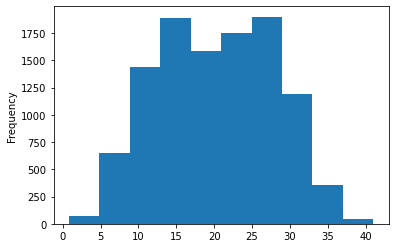

In [35]:
bikes["temp"].plot.hist()

### Lines

<AxesSubplot:xlabel='datetime'>

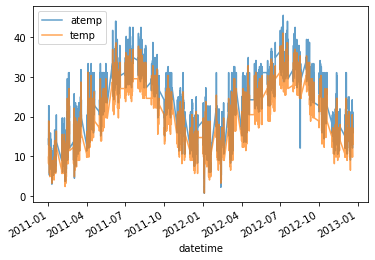

In [36]:
bikes.set_index("datetime").sort_index()[["atemp","temp"]].plot.line(alpha=0.7)

### Boxplots

<AxesSubplot:>

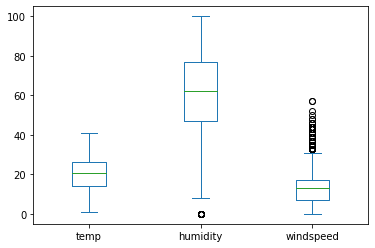

In [37]:
bikes[["temp", "humidity", "windspeed"]].plot.box()

## Conclusion

### Conclusion

Pandas is a pretty library with data manipulation routines:
1. Efficient data storage and computations - via NumPy
2. Indexes - database-like
3. Functions for data loading - easier than direct file reading/parsing
4. Functions for statistics - cover most frequently used descriptive statistics
5. Functions for plots - easier than plotting with specialised libraries
6. Flexibility - easy to extend with required data manipulation routines

# Thank you